# Load packages

# Load data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.metrics import brier_score_loss

import xgboost as xgb
from xgboost import XGBClassifier

In [120]:
#all_games_df = pd.read_csv('Data/~Created data/all_games_df.csv')

path = "C:/Users/anovitt/AppData/Local/Programs/Python/Python36/Scripts/kaggle_mania_2020_men/google-cloud-ncaa-march-madness-2020-division-1-mens-tournament/"

In [121]:
#data_matrix_df = pd.read_csv('data_matrix.csv')

data_matrix_df = pd.read_csv(path + 'data_matrix.csv')
sub_matrix_df = pd.read_csv(path + 'sub_matrix.csv')

In [122]:
data_matrix_df.head(3)

,Season,DayNum,T1,T1_Points,T2,T2_Points,Location,ResultDiff,X1_WinRatio14d,X1_Points_mean,...,X2_OppFgaMin,X1_Seed,X2_Seed,SeedDiff,X1_quality_march,X2_quality_march,T1_AP,T2_AP,T1_25Wins,T2_25Wins
0,2003,10,1104,68,1328,62,N,6,0.333333,69.285714,...,43,10,1,9,0.958527,1.044071,200.0,3.0,3,24
1,2003,10,1272,70,1393,63,N,7,0.750000,74.517241,...,52,7,3,4,1.049830,1.025533,19.0,13.0,23,24
2,2003,11,1266,73,1437,61,N,12,0.500000,78.392857,...,36,3,0,0,1.073925,0.000000,9.0,200.0,23,1


In [123]:
XX_train = data_matrix_df.drop(['Season','DayNum','T1','T1_Points','T2','T2_Points','Location','ResultDiff','T1_AP','T2_AP'],axis =1)

In [124]:
XX_train.head(3)

,X1_WinRatio14d,X1_Points_mean,X1_Points_sd,X1_Points_median,X1_fgm_mean,X1_fga_mean,X1_fgp,X1_fgm3_mean,X1_fga3_mean,X1_fg3p,...,X2_OppFgm3Mean,X2_OppFga3Mean,X2_OppFgaMin,X1_Seed,X2_Seed,SeedDiff,X1_quality_march,X2_quality_march,T1_25Wins,T2_25Wins
0,0.333333,69.285714,11.375273,69.0,24.035714,57.178571,0.420362,6.357143,19.857143,0.320144,...,4.433333,13.566667,43,10,1,9,0.958527,1.044071,3,24
1,0.750000,74.517241,8.724435,73.0,26.275862,60.000000,0.437931,7.000000,20.068966,0.348797,...,6.931034,22.586207,52,7,3,4,1.049830,1.025533,23,24
2,0.500000,78.392857,12.154375,75.5,27.214286,56.250000,0.483810,5.785714,15.250000,0.379391,...,7.266667,19.366667,36,3,0,0,1.073925,0.000000,23,1


In [125]:
sub_matrix_df.head(3)

,Unnamed: 0,ID,Pred,Season,T1,T2,X1_WinRatio14d,X1_Points_mean,X1_Points_sd,X1_Points_median,...,X2_OppFgaMin,X1_Seed,X2_Seed,SeedDiff,X1_quality_march,X2_quality_march,T1_AP,T2_AP,T1_25Wins,T2_25Wins
0,1,2015_1107_1112,0.5,2015,1107,1112,1.0,65.5,9.235276,64.0,...,39,14,2,12,0.74543,2.928111,200,200,0,0
1,2,2015_1107_1116,0.5,2015,1107,1116,1.0,65.5,9.235276,64.0,...,45,14,5,9,0.74543,1.189625,200,21,0,26
2,3,2015_1107_1124,0.5,2015,1107,1124,1.0,65.5,9.235276,64.0,...,39,14,3,11,0.74543,1.702049,200,200,0,0


In [126]:
X_test = sub_matrix_df.drop(['Season','ID','T1','T2','Pred','Unnamed: 0','T1_AP','T2_AP'],axis =1)

In [127]:
X_test.head(3)

,X1_WinRatio14d,X1_Points_mean,X1_Points_sd,X1_Points_median,X1_fgm_mean,X1_fga_mean,X1_fgp,X1_fgm3_mean,X1_fga3_mean,X1_fg3p,...,X2_OppFgm3Mean,X2_OppFga3Mean,X2_OppFgaMin,X1_Seed,X2_Seed,SeedDiff,X1_quality_march,X2_quality_march,T1_25Wins,T2_25Wins
0,1.0,65.5,9.235276,64.0,22.0625,50.15625,0.439875,6.15625,17.09375,0.360146,...,5.323529,16.205882,39,14,2,12,0.74543,2.928111,0,0
1,1.0,65.5,9.235276,64.0,22.0625,50.15625,0.439875,6.15625,17.09375,0.360146,...,6.235294,17.647059,45,14,5,9,0.74543,1.189625,0,26
2,1.0,65.5,9.235276,64.0,22.0625,50.15625,0.439875,6.15625,17.09375,0.360146,...,5.718750,19.250000,39,14,3,11,0.74543,1.702049,0,0


In [128]:

data_matrix_df['Win'] = 0

data_matrix_df.loc[data_matrix_df['T1_Points'] > data_matrix_df['T2_Points']] = 1


In [129]:
yy_train = data_matrix_df['Win']

In [130]:
X_train, X_val, y_train, y_val = train_test_split(XX_train, yy_train, test_size=0.25, random_state=42)


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Note: test is 2019 predictions but our "test" holdout set is referred to as "valid" 

In [131]:
X_test = X_test.astype("float64")
XX_train = XX_train.astype("float64")
X_train = X_train.astype("float64")
X_val = X_val.astype("float64")
#y_train = y_train.astype("float64")
#y_val = y_val.astype("float64")

# Scoring rules and two benchmarks

In [132]:
def LogLoss(predictions, realizations):
    predictions_use = predictions.clip(0)
    realizations_use = realizations.clip(0)
    LogLoss = -np.mean( (realizations_use * np.log(predictions_use)) + 
                        (1 - realizations_use) * np.log(1 - predictions_use) )
    return LogLoss

# Fit a neural network (with and without line)

Normalize data (using z-scores) before neural network

In [133]:
scaler = StandardScaler()
scaler.fit(X_train)  # Fit only to the training data
scaler.fit(X_val)
scaler.fit(X_test)
scaler.fit(XX_train)
scaled_X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
scaled_XX_train = pd.DataFrame(scaler.transform(XX_train), index=XX_train.index, columns=X_train.columns)
scaled_X_valid = pd.DataFrame(scaler.transform(X_val), index=X_val.index, columns=X_val.columns)
scaled_X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [106]:
#scaled_X_train[scaled_X_train.isna().any(axis=1)]

#df[df.isna().any(axis=1)]

With line (note: we won't have line in the rounds after the first, but we could use this for the first round only like Lopez and Matthews did) 

In [134]:
#Note: I tried logistic activation and different combinations of hidden layers/nodes
#Hyperparameters below minimized the log loss in the holdout set
#I also submited a prediction with 10 nodes in the first layer, but this is the submission that placed 4th (w/ 8 in 1st)
nn = MLPClassifier(activation='relu', hidden_layer_sizes=(8,5,3),random_state=201, max_iter=1000)
nn.fit(scaled_X_train,y_train)
nn_pred = pd.DataFrame(nn.predict_proba(scaled_X_valid))[1]

In [135]:
LogLoss(nn_pred, y_val)

0.9844406167456764

In [136]:
#try second holdout (does worse, but still better than baseline of 54)
nn = MLPClassifier(activation='relu', hidden_layer_sizes=(8,8,5,3),random_state=201, max_iter=1000)
nn.fit(scaled_X_train,y_train)
nn_pred = pd.DataFrame(nn.predict_proba(scaled_X_valid))[1]

In [137]:
scaled_XX_train.shape

(121036, 119)

In [138]:
yy_train.shape

(121036,)

In [139]:
#try second holdout (does worse, but still better than baseline of 54)
nn = MLPClassifier(activation='relu', hidden_layer_sizes=(8,8,5,3),random_state=201, max_iter=1000)
nn.fit(scaled_XX_train,yy_train)
nn_pred_test = pd.DataFrame(nn.predict_proba(scaled_X_test))[1]

In [90]:
LogLoss(nn_pred, y_val)

0.9180835196508232

In [140]:
# write out prob csv file

nn_pred_test.to_csv(path + 'submitProb.csv', index=False)

Without line

# Create test predictions

In [35]:
#Note: I'm predicting home (lower seed) win probability. Need to convert to be consistent with output file (lower team ID)
second_rd_submission = pd.merge(test_combos_df, second_rd_submission_all, left_index=True, right_index=True)

In [36]:
second_rd_submission.loc[second_rd_submission['HTeamID']<second_rd_submission['RTeamID'], 'pred'] = second_rd_submission[1]
second_rd_submission.loc[second_rd_submission['HTeamID']>second_rd_submission['RTeamID'], 'pred'] = second_rd_submission[0]

In [37]:
second_rd_submission.to_csv('Data/~Created data/second_rd_submission_all.csv', index=False)

In [38]:
second_rd_submission = second_rd_submission[['ID','pred']]

In [39]:
second_rd_submission.head()

,ID,pred
0,2019_1101_1113,0.190039
1,2019_1101_1120,0.078436
2,2019_1101_1124,0.122828
3,2019_1101_1125,0.153890
4,2019_1101_1133,0.675128


In [40]:
second_rd_submission.tail()

,ID,pred
2273,2019_1449_1459,0.264454
2274,2019_1449_1463,0.674249
2275,2019_1458_1459,0.332634
2276,2019_1458_1463,0.896041
2277,2019_1459_1463,0.881246


In [41]:
#Export to submit to Kaggle
second_rd_submission.to_csv('Data/~Created data/second_rd_submission.csv', index=False)

# Other models

No model performed as well as the neural network

XGBoost

In [42]:
X_train = X_train[['is_tourney', 'Hwins_top25','Rwins_top25','HPointMargin','RPointMargin','HFG','RFG','HFG3','RFG3','HRankPOM','RRankPOM','Hadjem','Hadjo','Hadjd','Hluck','Radjem','Radjo','Radjd','Rluck','Htourny20plus','Rtourny20plus','HBig4Conf','RBig4Conf', 'HSeed','RSeed']]
X_valid= X_valid[['is_tourney', 'Hwins_top25','Rwins_top25','HPointMargin','RPointMargin','HFG','RFG','HFG3','RFG3','HRankPOM','RRankPOM','Hadjem','Hadjo','Hadjd','Hluck','Radjem','Radjo','Radjd','Rluck','Htourny20plus','Rtourny20plus','HBig4Conf','RBig4Conf', 'HSeed','RSeed']]
X_train_xgb = xgb.DMatrix(X_train, label = y_train)
X_valid_xgb = xgb.DMatrix(X_valid)

C:\Users\dlorenz\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\dlorenz\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [43]:
num_round_for_cv = 1000
param = {'max_depth':3, 'eta':0.01, 'seed':201, 'objective':'binary:logistic', 'nthread':2}

In [44]:
p = xgb.cv(param,
       X_train_xgb,
       num_round_for_cv,
       nfold = 5,
       show_stdv = False,
       verbose_eval = False,
       as_pandas = False)

In [45]:
p = pd.DataFrame(p)
use_num = p['test-error-mean'].argmin()

C:\Users\dlorenz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  


In [46]:
num_round = use_num
xgb_train = xgb.train(param, X_train_xgb, num_round)
xgb_valid_prob = pd.Series(xgb_train.predict(X_valid_xgb))

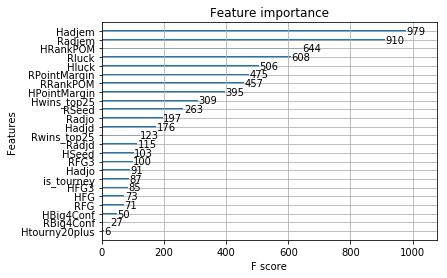

In [47]:
xgb.plot_importance(xgb_train)
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()

In [48]:
LogLoss(xgb_valid_prob, y_valid)

0.5179763780211779

Random forest

In [49]:
clf = RandomForestClassifier(n_estimators=200, max_depth=3, min_samples_leaf=3)
clf.fit(X_train, y_train)
rf_prob = pd.DataFrame(clf.predict_proba(X_valid))
LogLoss(rf_prob[1], y_valid)

0.5807195719900436

In [50]:
avg = (rf_prob[1]+xgb_valid_prob+nn_pred)/3

In [51]:
LogLoss(avg, y_valid)

0.5196065131373279